
# Portfolio Optimization: Classical Computing with MPT (Modern Potfolio Theory) versus Quantum Computing with VQE (Variational Quantum Eigensolver) 

In the first part, our portfolio optimization is based on MPT where we also use Sharp Ratio and later we take into account the risk aversion of the user and find the optimal portfolio with the highest return based on the volatility that will be entered by a user. Then in the second part, we will use a quantum computing approach with the VQE algorithm. We want to use the VQE algorithm, not the QAOA algorithm because VQE is more suitable for our current purposes as it requires less qubits than the QAOA algorithm. Thanks to IBM Quantum access we will be able to use quantum computers. 

# Classical Computing with MPT (Modern POrtfolio Theory)

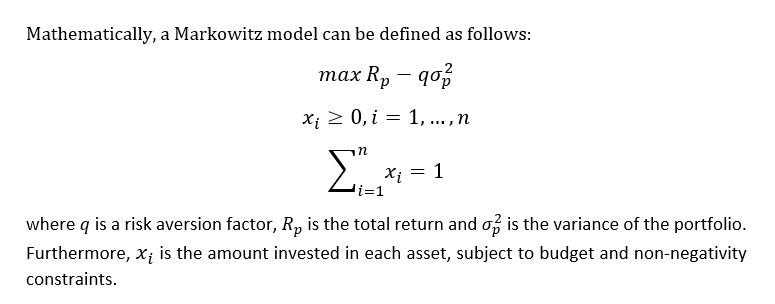

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import pandas_datareader as web

Here the users can write their assets for their portfolio:

In [44]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers = []

while True:
    try:
        ticker = input("Enter the ticker symbol of a stock to add to the portfolio (or type 'end' to stop adding. If you want to remove stock from your portfolio type 'remove ticker symbol of stock that you want to delete'): ")
        
        if ticker == "end":
            break
        elif ticker.startswith("remove "):
            ticker_to_remove = ticker.split(" ")[1].upper()
            
            if ticker_to_remove in tickers:
                tickers.remove(ticker_to_remove)
                print(f"Removed {ticker_to_remove} from the portfolio.")
            else:
                print(f"{ticker_to_remove} is not in the portfolio.")
        else:
            stock = yf.Ticker(ticker)
            stock_data = stock.history(start="2018-01-01", end=None)
            
            if not stock_data.empty:
                stock_data['returns'] = stock_data['Close'].pct_change()
                
                tickers.append(ticker.upper())
            else:
                print(f"Invalid ticker symbol: {ticker}. Please enter a valid ticker symbol.")
    except KeyboardInterrupt:
        print("\nExiting...")
        break
    except:
        print(f"Invalid ticker symbol: {ticker}. Please enter a valid ticker symbol.")

if tickers:
    portfolio_data = yf.download(tickers, start='2018-01-01')
    portfolio_returns = portfolio_data.pct_change().dropna()
    print(portfolio_data)
else:
    print("No tickers entered.")


Enter the ticker symbol of a stock to add to the portfolio (or type 'end' to stop adding. If you want to remove stock from your portfolio type 'remove ticker symbol of stock that you want to delete'): googl
Enter the ticker symbol of a stock to add to the portfolio (or type 'end' to stop adding. If you want to remove stock from your portfolio type 'remove ticker symbol of stock that you want to delete'): aapl
Enter the ticker symbol of a stock to add to the portfolio (or type 'end' to stop adding. If you want to remove stock from your portfolio type 'remove ticker symbol of stock that you want to delete'): jpn
Enter the ticker symbol of a stock to add to the portfolio (or type 'end' to stop adding. If you want to remove stock from your portfolio type 'remove ticker symbol of stock that you want to delete'): bac
Enter the ticker symbol of a stock to add to the portfolio (or type 'end' to stop adding. If you want to remove stock from your portfolio type 'remove ticker symbol of stock tha

As an example we choosed 10 stocks from 5 different industries and 2 cryptocurrencies: 

Technology:

Apple Inc. (AAPL)
Microsoft Corporation (MSFT)

Healthcare:

Johnson & Johnson (JNJ)
Pfizer Inc. (PFE)

Financial Services:

JPMorgan Chase & Co. (JPM)
Bank of America Corporation (BAC)

Consumer Goods:

The Coca-Cola Company (KO)
Procter & Gamble Company (PG)

Energy:

Exxon Mobil Corporation (XOM)
Chevron Corporation (CVX)

Cryptocurrency: 
Bitcoin (BTC-USD)
Etherium (ETH-USD)

In [45]:
# Just study adj close 
portfolio_data = portfolio_data['Adj Close']
portfolio_data.dropna(inplace=True)
print(portfolio_data)

                  AAPL        AMZN        BAC       BTC-USD      ETH-USD  \
Date                                                                       
2018-01-02   40.831596   59.450500  26.632412  14982.099609   884.443970   
2018-01-03   40.824478   60.209999  26.543339  15201.000000   962.719971   
2018-01-04   41.014111   60.479500  26.890724  15599.200195   980.921997   
2018-01-05   41.481071   61.457001  27.015421  17429.500000   997.719971   
2018-01-08   41.327000   62.343498  26.828367  15170.099609  1148.530029   
...                ...         ...        ...           ...          ...   
2022-03-18  162.767487  161.250504  41.857342  41801.156250  2945.343018   
2022-03-21  164.157150  161.491501  41.798798  41077.996094  2897.976562   
2022-03-22  167.571716  164.889008  43.106232  42358.808594  2973.131104   
2022-03-23  168.951431  163.408005  42.042721  42892.957031  3031.067139   
2022-03-24  172.782913  163.649506  42.023209  43960.933594  3108.062012   

           

Thanks to Correlation Matrix users can see the correlation of assets within the portfolio: 
it is worth to note that most of time portfolio owners desire not to include positive correlated assets within their portfolio.

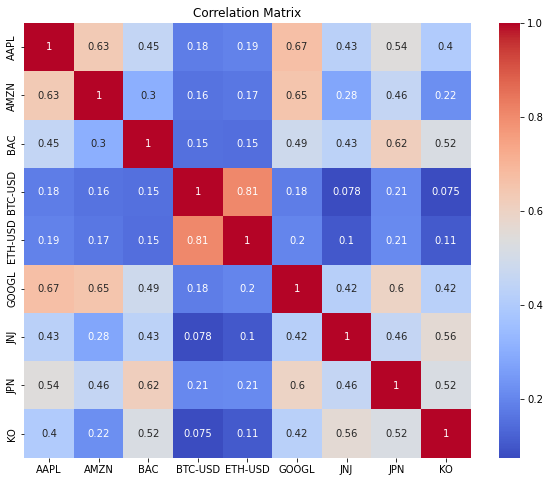

In [46]:
corr_matrix = portfolio_returns['Adj Close'].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Here we calculate random porfolio for comparison purposes because later we will use monte carlo simulation which will help us
to find better portfolio

In [47]:
np.random.seed(1)
num_stocks = portfolio_data.shape[1]
# Weight each security
weights = np.random.random((num_stocks,1))
# normalize it, so that sum is one
weights /= np.sum(weights)
print(f'Normalized Weights : {weights.flatten()}')

# We generally do log return instead of return
log_ret = np.log(portfolio_data / portfolio_data.shift(1))
log_ret

# Expected return (weighted sum of mean returns). Mult by 252 as we always do annual calculation and year has 252 business days
exp_ret = log_ret.mean().dot(weights)*252 
print(f'\nExpected return of the portfolio is : {exp_ret[0]}')

# Exp Volatility (Risk)
exp_vol = np.sqrt(weights.T.dot(252*log_ret.cov().dot(weights)))
print(f'\nVolatility of the portfolio: {exp_vol[0][0]}')

# Risk-free Rate
risk_free_rate = yf.Ticker('^TNX').history(period='1d', start='2018-01-01', end=None)['Close'].mean() / 100

# Sharpe ratio
sr = (exp_ret - risk_free_rate) / exp_vol
print(f'\nSharpe ratio of the portfolio: {sr[0][0]}')

Normalized Weights : [1.59933188e-01 2.76253510e-01 4.38641822e-05 1.15948347e-01
 5.62827314e-02 3.54130134e-02 7.14331357e-02 1.32526889e-01
 1.52165321e-01]

Expected return of the portfolio is : 0.19564120955064607

Volatility of the portfolio: 0.24402718566413995

Sharpe ratio of the portfolio: 0.7127144607055975


# Monte Carlo Simulation

We simply randomize the security weights and compare the returns to the risks. And from among these weights, we will choose the one with the best return for a given risk. In this part, as an example, our Monte Carlo has 50,000 simulations but it
is not enough because the number of combinations increases exponentially. as the number of assets increases in the portfolio. Basically, the number of simulation increase as 101^n where n is the number of assets in the portfolio. Portfolio with 12 asset types mathematically should have at least 1.126825e+24 simulations, but it is impossible even with super computers. In practice
most of times quants do not run huge number of simulations. It's worth noting that the precise number of simulations used by quants can depend on factors such as computational resources, time constraints, and the level of precision required by the specific problem or model. Quants aim to strike a balance between accuracy and computational efficiency to meet their objectives effectively.

In [48]:
# number of simulation
n = 50000
# n = 10

port_weights = np.zeros(shape=(n,len(portfolio_data.columns)))
port_volatility = np.zeros(n)
port_sr = np.zeros(n)
port_return = np.zeros(n)


for i in range(n):
    weights = np.random.random(num_stocks)
    # normalize it, so that sum is one
    weights /= np.sum(weights)
    port_weights[i,:] = weights 

    # Expected return (weighted sum of mean returns). Mult by 252 as we always do annual calculation and year has 252 business days
    exp_ret = log_ret.mean().dot(weights)*252 
    port_return[i] = exp_ret

    # Exp Volatility (Risk)
    exp_vol = np.sqrt(weights.T.dot(252*log_ret.cov().dot(weights)))
    port_volatility[i] = exp_vol

    # Sharpe ratio
    sr = (exp_ret - risk_free_rate) / exp_vol
    port_sr[i] = sr

In [49]:
# Index of max Sharpe Ratio
max_sr = port_sr.max()
ind = port_sr.argmax()
# Return and Volatility at Max Sharp Ratio
max_sr_ret = port_return[ind]
max_sr_vol = port_volatility[ind]

# Index of min Volatility
min_vol = port_volatility.min()
ind_min_vol = port_volatility.argmin()
# Return and Sharp Ratio at min Volatility
min_vol_return = port_return[ind_min_vol]
min_vol_sr = (min_vol_return - risk_free_rate) / min_vol

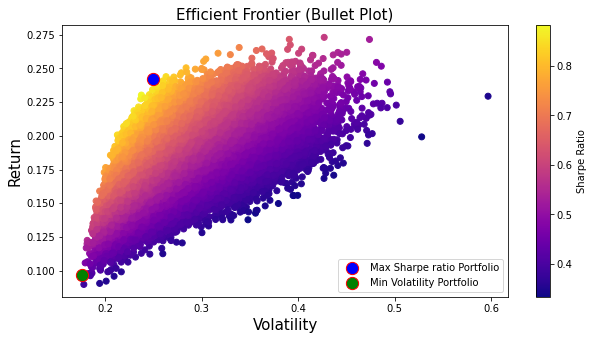

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier (Bullet Plot)', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', marker='o', label='Max \
Sharpe ratio Portfolio')
plt.scatter(min_vol, min_vol_return, c='green', s=150, edgecolors='red', marker='o', label='Min \
Volatility Portfolio')
plt.legend();

Here we can see outputs of Max Sharp Ratio Portfolio:

In [51]:
print("Max Sharp Ratio Portfolio :")
print("Sharp Ratio is", max_sr)
print("Return is", max_sr_ret)
print("Volatility is", max_sr_vol)

Max Sharp Ratio Portfolio :
Sharp Ratio is 0.8825026082375761
Return is 0.24212910339190755
Volatility is 0.2497551801116579


Suggested weights of assets within portfolio:

In [52]:
stocks = portfolio_data.columns
for weight, stock in zip(port_weights[ind],stocks):
    print(f'{round(weight * 100, 2)} % of {stock} should be bought.')

26.65 % of AAPL should be bought.
28.28 % of AMZN should be bought.
4.83 % of BAC should be bought.
7.09 % of BTC-USD should be bought.
0.54 % of ETH-USD should be bought.
20.12 % of GOOGL should be bought.
1.7 % of JNJ should be bought.
0.2 % of JPN should be bought.
10.6 % of KO should be bought.


Here we can see outputs of Min Volatility Portfolio:

In [53]:
print("Min Volatility Portfolio :")
print("Sharp Ratio is", min_vol_sr)
print("Return is", min_vol_return)
print("Volatility is", min_vol)

Min Volatility Portfolio :
Sharp Ratio is 0.42621861043139225
Return is 0.09673607634826649
Volatility is 0.17600491623257716


In [54]:
from scipy.optimize import minimize


def PortfolioVolatility(weights, returns):
    
    avg_ret = returns.mean()
    exp_ret = np.dot(weights, avg_ret)
    
    vcv_mat = returns.corr()
    
    pf_var  = vcv_mat.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    
    sd      = np.sqrt(pf_var)
    
    return sd

# constraint: sum(weights) = 1
fconst = lambda w: 1 - sum(w)
cons   = ({'type':'eq','fun':fconst})

N    = len(portfolio_data.columns)
w0   = N*[1/N]
bnds = [[0, 1] for i in range(N)]

sol  = minimize(PortfolioVolatility,
                w0,
                args        = portfolio_data.pct_change(),
                bounds      = bnds,
                constraints = cons)

min_vol_weights = sol.x

In [55]:
portfolio_returns = portfolio_data.pct_change()

volatility = PortfolioVolatility(min_vol_weights, portfolio_returns)
print("Portfolio Volatility:", volatility)

Portfolio Volatility: 0.6235723172160594


Suggested weights of assets within portfolio:

In [35]:
stocks = portfolio_data.columns
for weight, stock in zip(port_weights[ind_min_vol],stocks):
    print(f'{round(weight * 100, 2)} % of {stock} should be bought.')

0.18 % of AAPL should be bought.
1.14 % of GOOGL should be bought.
98.68 % of JPN should be bought.


# Now we will find the optimal portfolio based on the risk aversion of user

In this case the optimal portfolio based on the risk aversion of users. If the risk aversion of users is high they will type
low volatility, but if the risk aversion of users is low then they will type high volatility to get high return.

In [15]:
vol_range = input("Enter your desired volatility range in the format 'min-max': ")
min_vol, max_vol = map(float, vol_range.split('-'))
ind_user_vol = np.where((port_volatility >= min_vol) & (port_volatility <= max_vol))[0]
if len(ind_user_vol) == 0:
    print("No portfolios found within the specified volatility range.")
else:
    max_return_index = np.argmax(port_return[ind_user_vol])
    user_vol_return = port_return[ind_user_vol][max_return_index]
    user_vol = port_volatility[ind_user_vol][max_return_index]
    user_vol_sr = (user_vol_return - risk_free_rate) / user_vol

Enter your desired volatility range in the format 'min-max': 0.2-0.22


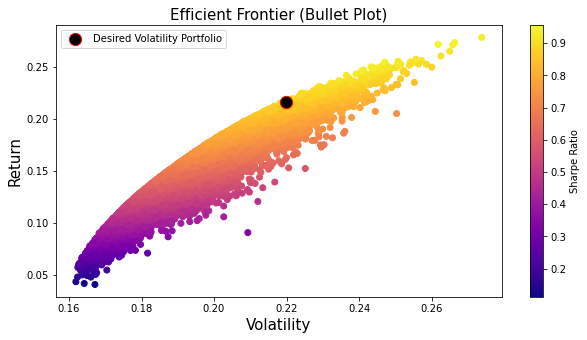

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier (Bullet Plot)', fontsize=15)
plt.scatter(user_vol, user_vol_return, c='black', s=150, edgecolors='red', marker='o', label='Desired Volatility Portfolio')
plt.legend();

Here we can see outputs based on risk aversion of users:

In [18]:
print("Desired Volatility Portfolio :")
print("Sharp Ratio is", user_vol_sr)
print("Return is", user_vol_return)
print("Given Volatility is", user_vol)

Desired Volatility Portfolio :
Sharp Ratio is 0.8874697823856635
Return is 0.21690075921522742
Given Volatility is 0.2199299942921651


Suggested weights of assets within portfolio:

In [19]:
stocks = portfolio_data.columns
for weight, stock in zip(port_weights[ind_user_vol].flatten(), stocks):
    print(f'{round(float(weight) * 100, 2)} % of {stock} should be bought.')

30.61 % of AAPL should be bought.
19.44 % of GOOGL should be bought.
0.1 % of JNJ should be bought.
20.91 % of JPN should be bought.
11.07 % of KO should be bought.
17.86 % of PFE should be bought.
